In [1]:
import math 
import pandas as pd
import yfinance as yf
import statsmodels.tsa.stattools as smt
import datetime
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import read_csv
from sklearn.linear_model import LinearRegression
import math
import numpy as np
import scipy.stats as stats
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestPower
import random

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Statistical Significance

# Непараметрический тест

In [3]:
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.power import TTestIndPower

def check_profit_hypothesis_3(profit:pd.DataFrame, null_hypothesis=10):
    
    # Вычитаем нулевую гипотезу из массива кумулятивного дохода
    profit_diff = np.array(profit) - null_hypothesis
    
    # Применяем одновыборочный критерий Вилкоксона
    stat, p_value = wilcoxon(profit_diff, alternative="greater")
    
    # Выводим результаты
    print(f"Статистика: {stat}, p-значение: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу. Средняя месячная прибыль стратегии вероятно больше {null_hypothesis} долларов.")
    else:
        print(f"Не можем отвергнуть нулевую гипотезу. Недостаточно данных для утверждения, что средняя прибыль стратегии больше {null_hypothesis} долларов.")

In [4]:
# пример использования
data = {
    'sum_of_deals': [-20, 4, 11, 11, 11, 11, 11, 11]
}

df = pd.DataFrame(data)

In [21]:
check_profit_hypothesis_3(df, 380)

Статистика: [4122.], p-значение: [0.09878884]
Не можем отвергнуть нулевую гипотезу. Недостаточно данных для утверждения, что средняя прибыль стратегии больше 380 долларов.


# Параметрический тест

In [6]:
def check_profit_hypothesis(profits: pd.DataFrame, target_profit=1.0, alpha=0.05, desired_power=0.8):
    """
    Проверяет гипотезу о том, что средняя прибыль стратегии больше target_profit.
    Возвращает результаты статистического анализа, такие как t-статистика, p-значение,
    статистическая мощность, и необходимый размер выборки для заданной мощности и уровня значимости.
    
    :param profits: массив прибылей
    :param target_profit: значение прибыли, которое мы хотим проверить (по умолчанию 1.0)
    :param alpha: порог статистической значимости (по умолчанию 0.05)
    :param desired_power: желаемая статистическая мощность (по умолчанию 0.8)
    :return: результаты статистического анализа, включая t-статистику, p-значение, 
    статистическую мощность, и необходимый размер выборки для заданной мощности и уровня значимости
    """
    print('------------------------------------------------------------------')
    
    # функция изначально написана для массива, так что если на вход подаётся датафрейм, то преобразуем в массив
    if isinstance(profits, pd.DataFrame):
        profits = profits.iloc[:, 0].values
        
        
    # Рассчитываем среднюю прибыль, стандартное отклонение и количество сделок
    mean_profit = np.mean(profits)
    std_profit = np.std(profits, ddof=1)
    num_trades = len(profits)

    # Рассчитываем t-статистику и p-значение
    t_stat, p_value = stats.ttest_1samp(profits, target_profit)

    # Проверяем статистическую значимость для новых гипотез
    if p_value < alpha and t_stat > 0:
        print("Отвергаем нулевую гипотезу: прибыль стратегии больше {} долларов (p-value = {:.4f})".format(target_profit, p_value))
    else:
        print("Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше {} долларов (p-value = {:.4f})".format(target_profit, p_value))

    # Рассчитываем статистическую мощность (используя среднее и стандартное отклонение)
    effect_size = (mean_profit - target_profit) / std_profit
#     effect_size = abs((mean_profit - target_profit) / std_profit)
    power = TTestPower().power(effect_size, num_trades, alpha, alternative="larger")

    print("Статистическая мощность: {:.4f}".format(power))

    # Рассчитываем необходимый размер выборки для заданной мощности и уровня знач
    # Рассчитываем необходимый размер выборки для заданной мощности и уровня значимости
    desired_power = 0.8
    required_num_trades = smp.TTestPower().solve_power(effect_size, power=desired_power, alpha=alpha, alternative="larger")
    print(f'Размер эффекта: {effect_size}')
    print("Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости {}:  {}".format(alpha, np.ceil(required_num_trades).astype(int)))
    print('------------------------------------------------------------------')


In [7]:
data = [263.9632526,
242.1856214,
354.7278898,
200.5701441,
399.5358386,
340.3437055,
376.4985407,
294.341567,
301.5415408,
450.1187703,
330.3628297,
514.9764508,
354.0658617,
313.33531,
284.6854019,
217.1951426,
287.62086,
379.1342482,
367.5893078,
204.9784654,
430.914587,
230.0239687,
442.982582,
295.1034924,
311.4906711,
306.8834013,
398.9855183,
243.7390359,
223.5010473,
233.1678062,
411.0953008,
228.3137828,
293.9017508,
251.716526,
466.7383072,
349.5177312,
331.2043047,
146.237697,
365.4343315,
320.9653823,
559.5132397,
572.8930288,
594.0681978,
569.7323218,
410.1125859,
601.7105946,
486.7173697,
592.0652467,
583.7014518,
228.1833295,
511.5600732,
476.2689442,
297.2625113,
575.2037047,
697.7293154,
407.8271821,
303.2012545,
331.7896747,
415.8580836,
375.708425,
332.1002477,
536.7043136,
396.8725388,
433.356469,
499.0323618,
589.4502121,
368.978932,
647.8966839,
278.8070863,
372.1478713,
408.1745617,
445.5184188,
372.5970919,
734.361613,
501.807779,
486.6549355,
356.1427776,
436.8771003,
726.435871,
471.8337568,
356.9197213,
511.1320115,
405.9101536,
381.4739281,
434.4072723,
470.9962244,
199.8011422,
392.3605564,
526.678396,
403.0758225,
394.3523339,
195.9487037,
391.9150582,
385.6438115,
359.1089052,
332.416634,
515.0194144,
524.3838912,
207.1852234,
445.862201,
294.5767041,
422.5341908,
374.4263491,
429.5693153,
316.2265974,
431.8561814,
344.1393147,
443.8997122,
542.0021318,
601.8873627,
303.0128818,
318.9263794,
426.0102853,
567.3114481,
364.5696773,
366.7456617,
468.281671,
427.3980869,
437.2640111,
404.8522004]

In [8]:
# пример использования
data = {
    'sum_of_deals': data
}

df = pd.DataFrame(data)

In [12]:
df.mean()

sum_of_deals    398.888556
dtype: float64

In [22]:
check_profit_hypothesis(df, target_profit=380)

------------------------------------------------------------------
Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше 380 долларов (p-value = 0.0852)
Статистическая мощность: 0.5322
Размер эффекта: 0.15844293125174524
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  248
------------------------------------------------------------------


# Расчёт коэффициентов и метрик

In [9]:
# эту функцию я использую, чтобы преобразовывать ряд с доходностями в процентах в ряд с доходами в долларах
# так удобнее задавать примеры 
def calculate_monthly_income(percentages, initial_capital):
    monthly_incomes = []
    current_capital = initial_capital

    for percentage in percentages:
        income = current_capital * (percentage / 100)
        monthly_incomes.append(income)
        current_capital += income

    return pd.DataFrame(monthly_incomes)


# Пример использования функции
percentages = [5, -3, 10, -2, 4] # Процентная доходность за каждый месяц
initial_capital = 10000 # Начальный капитал

monthly_incomes = calculate_monthly_income(percentages, initial_capital)
print(monthly_incomes)

           0
0   500.0000
1  -315.0000
2  1018.5000
3  -224.0700
4   439.1772


# GHPR

In [10]:
def calc_GHPR(initial_value: float, final_value: float, num_deals: float):
    '''
    initial_value - сумма на старте торговли
    final_value - сумма по окончании торговли
    num_deals - количество месяцев торговли
    
    absolute - среднее геометрическое за сделку
    '''
    absolute = 100*((final_value / initial_value) ** (1 / num_deals) - 1) # в процетнах
    
    return absolute  # в процентах

In [11]:
# Пример использования функции
initial_value = 1000  # Начальная сумма инвестиций
final_value = 2000    # Конечная сумма инвестиций
num_deals = 100    # Количество месяцев

cagr_value = calc_GHPR(initial_value, final_value, num_deals)
print(cagr_value)

0.6955550056718884


# AHPR

In [12]:
def calc_AHPR(dataframe: pd.DataFrame, initial_sum: float):
    '''
    initial_sum - сумма на старте торговли
    dataframe - датафрейм со всеми профитами в долларах (можно скинуть сгруппированный по периодам, тогда на выходе будет средний за период)
    relative_expectation - средний доход на сделку в долларах
    absolute_expectation - срединй доход на сделку в процентах
    '''
    relative_expectation = dataframe.values.mean() # в долларах 
    
    dataframe['Equity'] = dataframe.cumsum()
    dataframe['Equity'] = dataframe['Equity'] + initial_sum
    returns = []
    returns.append((dataframe['Equity'][0] / initial_sum - 1)*100) # доходность за первый месяц
    
    # доходности за последующие месяцы
    for i in range(1,len(dataframe)):
        returns.append((dataframe['Equity'][i] / dataframe['Equity'][i-1] - 1)*100)
    dataframe['Returns'] = returns   
    
#     print(dataframe['Returns'])
    
    absolute_expectation = dataframe['Returns'].values.mean() # в процетнах
    
    
    
    return [absolute_expectation, relative_expectation] # в процентах, в долларах

In [13]:
# Пример использования функции
percentages = [5, -3, 100, -2, 4, 3, 3, 2, -5, 4, 7, -9] # Процентная доходность за каждый месяц
initial_capital = 1000 # Начальный капитал
monthly_incomes = calculate_monthly_income(percentages, initial_capital)
df = pd.DataFrame(monthly_incomes)

In [14]:
calc_AHPR(df, initial_capital)

[9.083333333333334, 96.77173468717781]

# CAGR

In [15]:
def calc_cagr(initial_value: float, final_value: float, num_periods: float):
    '''
    initial_value - сумма на старте торговли
    final_value - сумма по окончании торговли
    num_periods - количество месяцев торговли
    
    absolute - среднее геометрическое за месяц
    '''
    absolute = 100*((final_value / initial_value) ** (1 / num_periods) - 1) # в процентах
    
    return absolute

In [16]:
# Пример использования функции
initial_value = 1000  # Начальная сумма инвестиций
final_value = 2000    # Конечная сумма инвестиций
num_periods = 2      # Количество месяцев

cagr_value = calc_cagr(initial_value, final_value, num_periods)

In [17]:
cagr_value

41.42135623730952

# Max DD

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
def max_drawdown(data: pd.DataFrame, initial_sum, plot=False):
    """
    Функция для расчета максимальной просадки в заданном временном ряду.

    :param data: list, массив результатов сделок или временной ряд.
    :return: float, максимальная просадка в процентах.
    """

    # Преобразуем список в pandas.DataFrame, чтобы использовать встроенные методы
    df = pd.DataFrame(data.values, columns=["result"])
    
    df['result'] = df.result.cumsum()
    df['result'] = df['result'] + initial_investment
    
    # Создаем новый датафрейм с одним значением 1000
    initial_value = pd.DataFrame({'result': [initial_sum]})

    # Добавляем значение initial_sum в начало столбца 'Profits' чтобы капитал менялся с нулевого месяца
    df = pd.concat([initial_value, df], ignore_index=True)

    
    # Рассчитываем кумулятивный максимум на каждом шаге
    cummax = df["result"].cummax()
#     print(cummax)

    if plot == True:
        plt.plot(df["result"])
#         plt.plot(cummax)
        plt.show()
    # Рассчитываем текущую просадку на каждом шаге
    drawdown = (cummax - df["result"]) / cummax
    
    if plot == True:
        plt.plot(-100*drawdown)

    # Находим максимальную просадку и возвращаем ее значение
    max_dd = drawdown.max()
    return max_dd*100

# Sortino ratio

In [19]:
def sortino_ratio(dataframe: pd.DataFrame, risk_free_rate: float, initial_investment: float):
        
    '''
    dataframe - датафрейм размером Nx1,где N - количество торговых месяцев. В этом датафрейме должны быть записаны 
                профиты по паре активов за каждую сделку, СГРУППИРОВАННЫЕ ПО МЕСЯЦАМ ТОРГОВЛИ. Без учета начального капитала.
                То есть все сделки, которые совершены в первый месяц, суммируются и записываются в [0] ячейку, второй месяц - [1]
                ячейку и т.д.
    risk_free_rate - процент доходости в месяц, который предполагается заработать без риска (например, гос. облигации)
    initial_investment - сумма инвестиций на момент запуска торговли
    '''
    dataframe['Equity'] = dataframe.cumsum()
    dataframe['Equity'] = dataframe['Equity'] + initial_investment
    returns = []
    returns.append((dataframe['Equity'][0] / initial_investment - 1)*100) # доходность за первый месяц
    
    # доходности за последующие месяцы
    for i in range(1,len(dataframe)):
        returns.append((dataframe['Equity'][i] / dataframe['Equity'][i-1] - 1)*100)
    dataframe['Returns'] = returns  
#     print(dataframe['Returns'])
    
    # Вычисляем избыточную доходность за каждый месяц
    dataframe['excess_return'] = dataframe['Returns'] - risk_free_rate

    # Вычисляем среднюю избыточную доходность
    mean_excess_return = np.mean(dataframe['excess_return'])
    
    # Вычисляем ниже порога (безрисковая ставка) стандартное отклонение
    downside_deviation = np.sqrt(np.mean(np.square(np.minimum(0, dataframe['excess_return']))))
    
    # Вычисляем Sortino Ratio
    sortino = mean_excess_return / downside_deviation
    
    return sortino # значение коэффициента (не в процентах)

In [20]:
# пример использования
data = {
    'sum_of_deals': [400, -500, 300, -100, 200]
}

df = pd.DataFrame(data)
mar = 2 # Минимальный порог, сколько мы хотим, чтобы стратегия зарабатывала в месяц
initial_investment = 1000 # Начальная сумма инвестиций

sortino = sortino_ratio(df, mar, initial_investment)
print(f"Sortino Ratio: {sortino:.4f}")

Sortino Ratio: 0.4285


# Sharp Rario

In [21]:
import pandas as pd
import numpy as np

def sharp_ratio(dataframe: pd.DataFrame, risk_free_rate: float, initial_investment: float):
    '''
    dataframe - датафрейм размером Nx1,где N - количество торговых месяцев. В этом датафрейме должны быть записаны 
                профиты по паре активов за каждую сделку, СГРУППИРОВАННЫЕ ПО МЕСЯЦАМ ТОРГОВЛИ. Без учета начального капитала.
                То есть все сделки, которые совершены в первый месяц, суммируются и записываются в [0] ячейку, второй месяц - [1]
                ячейку и т.д.
    risk_free_rate - процент доходости в месяц, который предполагается заработать без риска (например, гос. облигации)
    initial_investment - сумма инвестиций на момент запуска торговли
    '''
        
    dataframe['Equity'] = dataframe.cumsum()
    dataframe['Equity'] = dataframe['Equity'] + initial_investment
    returns = []
    returns.append((dataframe['Equity'][0] / initial_investment - 1)*100)
    for i in range(1,len(dataframe)):
        returns.append((dataframe['Equity'][i] / dataframe['Equity'][i-1] - 1)*100)
        
    dataframe['Returns'] = returns    
    mean_returns = dataframe['Returns'].mean()
    std_returns = dataframe['Returns'].std()

    
    # Вычисляем Sharp Ratio
    sortino = (mean_returns - risk_free_rate) / std_returns
    
    return sortino # значение коэффициента (не в процентах)

In [22]:
data = {
    'sum_of_deals': [200, -100, 300]
}

df = pd.DataFrame(data)
mar = 0.165 # Минимальный порог, сколько мы хотим, чтобы стратегия зарабатывала в месяц
initial_investment = 1000 # Начальная сумма инвестиций

sortino = sharp_ratio(df, mar, initial_investment)
print(f"Sharp Ratio: {sortino:.4f}")


Sharp Ratio: 0.6812


# Calmar ratio

In [23]:
import pandas as pd
import numpy as np

def calmar_ratio(dataframe: pd.DataFrame, initial_investment: float):
    
    df = pd.DataFrame(dataframe.values, columns=["result"])
    
    df['Equity'] = df.result.cumsum()
    df['Equity'] = df['Equity'] + initial_investment
    
    cagr = calc_cagr(initial_investment, df['Equity'].values[-1], len(df['Equity']))
    max_dd = max_drawdown(df.result, initial_investment)
    
#     print(cagr)
#     print(max_dd)
    
    # Вычисляем коэффициент Кальмара   
    calmar = cagr / max_dd
    
    return calmar

In [24]:
data = {
    'sum_of_deals': [400, -100, 300, 150, 200]
}

df = pd.DataFrame(data)
initial_investment = 1000  # Начальная сумма инвестиций

calmar = calmar_ratio(df, initial_investment)
print(calmar)

2.0005517197618508


# Омега

In [25]:
import pandas as pd
import numpy as np

def omega_ratio(dataframe: pd.DataFrame, risk_free_rate: float, initial_investment: float):
        
    '''
    dataframe - датафрейм размером Nx1, где N - количество торговых месяцев. В этом датафрейме должны быть записаны 
                профиты по паре активов за каждую сделку, СГРУППИРОВАННЫЕ ПО МЕСЯЦАМ ТОРГОВЛИ. Без учета начального капитала.
                То есть все сделки, которые совершены в первый месяц, суммируются и записываются в [0] ячейку, второй месяц - [1]
                ячейку и т.д.
    risk_free_rate - процент доходости в месяц, который предполагается заработать без риска (например, гос. облигации)
    initial_investment - сумма инвестиций на момент запуска торговли
    '''
    
    dataframe['Equity'] = dataframe.cumsum()
    dataframe['Equity'] = dataframe['Equity'] + initial_investment
    returns = []
    returns.append((dataframe['Equity'][0] / initial_investment - 1)*100) # доходность за первый месяц
    
    # доходности за последующие месяцы
    for i in range(1,len(dataframe)):
        returns.append((dataframe['Equity'][i] / dataframe['Equity'][i-1] - 1)*100)
    dataframe['Returns'] = returns  
    
#     print(dataframe['Returns'])

    # Вычисляем избыточную доходность за каждый месяц
    dataframe['excess_return'] = dataframe['Returns'] - risk_free_rate

    # Вычисляем положительную и отрицательную избыточную доходность
    positive_excess_return = dataframe['excess_return'][dataframe['excess_return'] > 0].sum()
    negative_excess_return = abs(dataframe['excess_return'][dataframe['excess_return'] < 0].sum())

    # Вычисляем Omega Ratio
    omega = positive_excess_return / negative_excess_return
    
    return omega # значение коэффициента (не в процентах)


In [26]:
data = {
    'sum_of_deals': [400, -1000, -300, 150, 200]
}

df = pd.DataFrame(data)
initial_investment = 1000  # Начальная сумма инвестиций
mar = 2

omega = omega_ratio(df, mar, initial_investment)
print(omega)

1.7549857549857548


# Profit factor 

In [27]:
import pandas as pd
import numpy as np

def profit_factor(dataframe: pd.DataFrame):
    '''
    dataframe - датафрейм размером со всеми сделками.
    '''
    # Вычисляем сумму прибыльных и убыточных сделок
    profits = dataframe[dataframe > 0].sum()
    losses = dataframe[dataframe < 0].sum()

    # Вычисляем коэффициент Profit Factor
    profit_factor = profits / abs(losses)

    return profit_factor[0]

In [28]:
data = {
    'sum_of_deals': [400, -1000, -300, 150, 200]
}

df = pd.DataFrame(data)

pf = profit_factor(df)
print(pf)

0.5769230769230769


# Z-index

In [29]:
def calculate_z(df: pd.DataFrame):
    '''
    df: Массив с профитами сделок
    Z: z-index
    '''
    # Convert profits to wins (1) and losses (-1)
    trade_outcomes = np.sign(df.values)
    
    # Count wins and losses
    W = (trade_outcomes == 1).sum()
    L = (trade_outcomes == -1).sum()
    
    # Calculate total number of trades
    N = len(trade_outcomes)
    
    # Calculate number of win/loss streaks
    changes = (trade_outcomes[:-1] != trade_outcomes[1:]).sum()
    R = changes + 1

    # Calculate P
    P = 2.0 * W * L

    # Calculate Z score
    numerator = (N * (R - 0.5) - P)
    denominator = np.sqrt((P * (P - N)) / (N - 1))
    Z = numerator / denominator

    return Z

In [30]:
# Test the function
profits = pd.DataFrame([+10, +10, +10, +10, +10, -10, -10, -10, -10, -10, -10, +10, -10, +10, +10, +10,+10, +10, +10, +10, -10, -10, -10, -10, -10, -10, -10, -10, -10, +10, +10, +10])
print(calculate_z(profits))

-3.4142776200342393


In [31]:
# Test the function
profits = pd.DataFrame([+10, +10, +10, -10, -10, -10, +10, +10, +10, -10, -10, -10])
print(calculate_z(profits))

-1.5138251770487459


In [32]:
# Test the function
profits = pd.DataFrame([+10, +10, +10, +10, +10, -10, +10, +10, +10, +10, +10, -10])
print(calculate_z(profits))

0.19820624179302299


In [33]:
data = {
    'sum_of_deals': [400, -1000, -300, 150, 200]
}

df = pd.DataFrame(data)

print(calculate_z(df))

0.1091089451179962


# Linear regression

Линейная регрессия и расчет SSE (сумма квадратов ошибок) могут быть полезными инструментами при анализе доходности торговой стратегии.

- Линейная регрессия: Регрессионный анализ может помочь установить, есть ли линейная зависимость между временем и доходностью торговой стратегии. Если есть такая зависимость, это может указывать на стабильность или рост доходности стратегии. Если же нет, это может говорить о том, что доходность колеблется вокруг среднего значения, и нет явного тренда роста или снижения.

- SSE: Сумма квадратов ошибок (SSE) - это мера того, насколько линейная регрессионная модель отклоняется от фактических данных. Она показывает, насколько хорошо линия регрессии соответствует данным. Меньшее значение SSE указывает на лучшее соответствие и, следовательно, на большую стабильность доходности. Большое значение SSE может указывать на большую волатильность или нестабильность доходности.

Однако стоит заметить, что использование линейной регрессии и SSE в данном контексте имеет смысл только если предполагается, что доходность торговой стратегии имеет линейный тренд. Если тренд нелинейный или отсутствует, эти метрики могут дать искаженное представление о стабильности или эффективности стратегии.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def linear_regression(df):
    # df - датафрейм с результатами сделок 
#     df = df.reset_index()
    df['Equity'] = df.cumsum()
    # Зададим модель линейной регрессии
    model = LinearRegression()

    # Обучим модель
    x = np.array(df.index).reshape(-1, 1)
    y = df['Equity']
    model.fit(x, y)

    # Сделаем предсказания
    y_pred = model.predict(x)

    # Посчитаем ошибку SSE
    residuals = y - y_pred
    sse = np.sum(residuals**2)
    print(f"SSE: {sse}")

    # Построим график
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color='blue')
    plt.plot(x, y_pred, color='red', linewidth=2)
    plt.xlabel('Index')
    plt.ylabel('Equity')
    plt.title('Linear Regression and Capital Change')
    plt.show()

    return model, sse

In [57]:
data = {
    'sum_of_deals': [0, 10, 20, -5, 7, 8]
}

df = pd.DataFrame(data)

In [58]:
to_test = calculate_monthly_income(scenario_3,1000)

SSE: 105956.24508385184


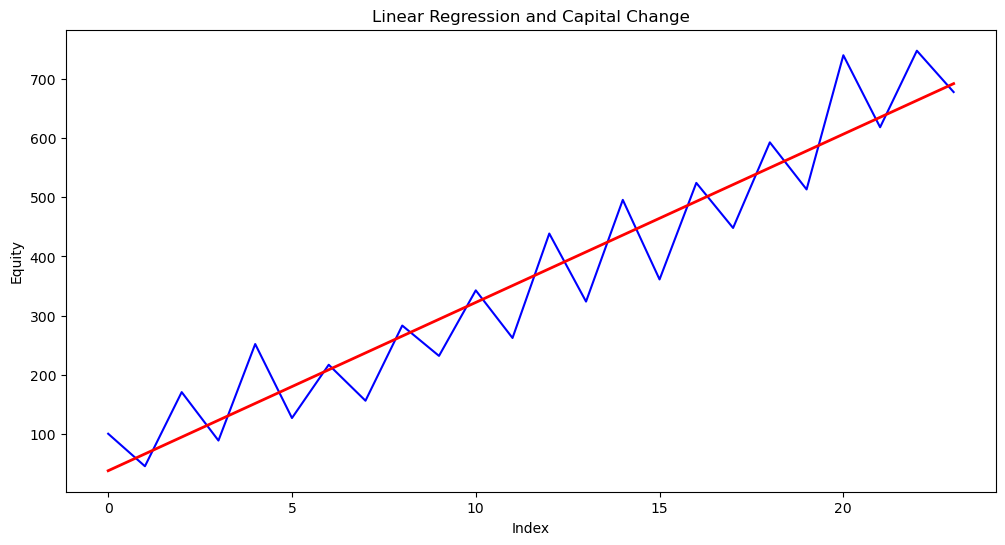

(LinearRegression(), 105956.24508385184)

In [59]:
linear_regression(to_test)

SSE: 1525788.3695226107


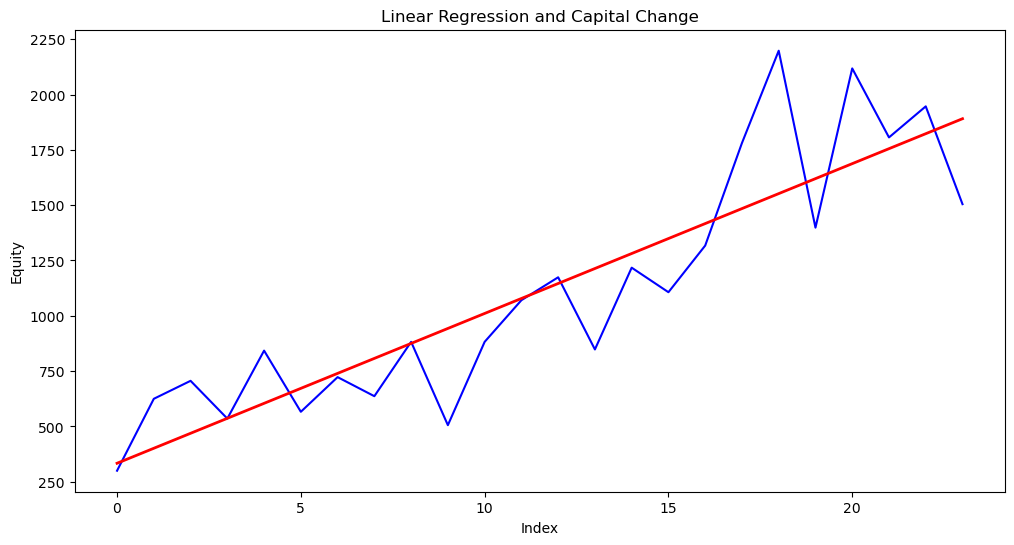

(LinearRegression(), 1525788.3695226107)

In [62]:
to_test = calculate_monthly_income(scenario_14,1000)
linear_regression(to_test)

SSE: 1416846.3382962337


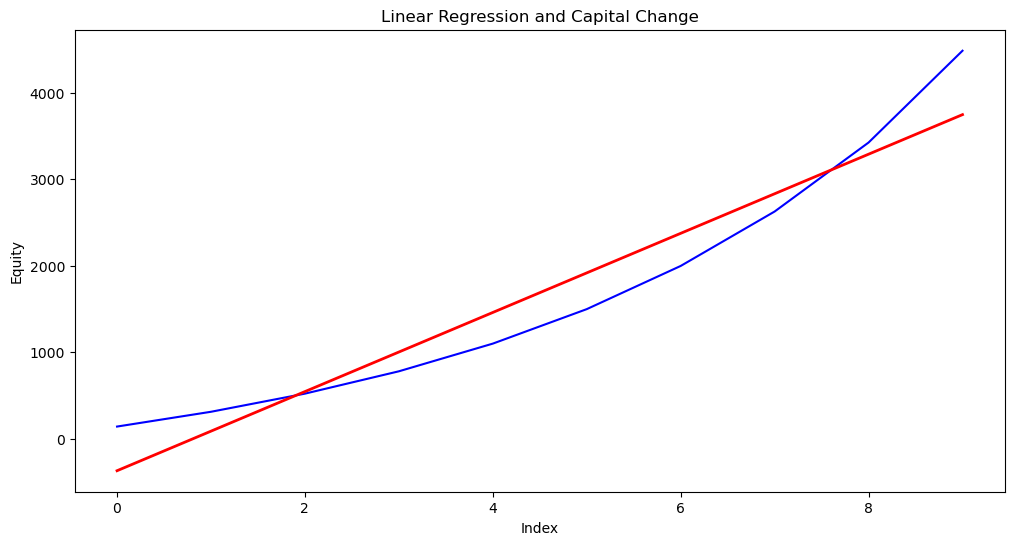

(LinearRegression(), 1416846.3382962337)

In [69]:
to_test = calculate_monthly_income([14,15,16,17,18,19,20,21,22,24],1000)
linear_regression(to_test)

# Запуск всех 

In [34]:
data = {
    'sum_of_deals': [400, -1000, -300, 150, 200]
}

df = pd.DataFrame(data)
initial_investment = 1000  # Начальная сумма инвестиций
mar = 2
initial_sum = 1000

In [35]:
print('Profit factor: ', profit_factor(df))
print('CMRG: ', calc_cagr(initial_sum, initial_sum+df.values.sum(), len(df)), '%')
print('Sortino ratio: ', sortino_ratio(df, 1, initial_sum))


Profit factor:  0.5769230769230769
CMRG:  -14.760184159617417 %
Sortino ratio:  0.505087775105181


In [36]:
def coeffs(data, initial_sum):
    
    data = calculate_monthly_income(data, initial_sum)

    df = data.copy()
    max_drawdown(df, initial_sum, True)

    df = data.copy()
    print('Profit factor: ', profit_factor(df))

    df = data.copy()
    print('CMRG: ', calc_cagr(initial_sum, initial_sum+df.values.sum(), len(df)), '%')
    
    df = data.copy()
    print('GHPR: ', calc_GHPR(initial_sum, initial_sum+df.values.sum(), len(df)), '%')
    
    df = data.copy()
    ahpr = calc_AHPR(df, initial_sum)
    print('AHPR (Expectation): ', ahpr[0], '%, ', ahpr[1], '$')
    
    df = data.copy()
    print('Deviation: ',df.values.std(), '$')
    
    df = data.copy()
    print('Z-index: ', calculate_z(df))

    df = data.copy()
    print('Omega: ', omega_ratio(df, 1, initial_sum))
    
    df = data.copy()
    print('Sortino ratio: ', sortino_ratio(df, 1, initial_sum))

    df = data.copy()
    print('Sharp ratio: ', sharp_ratio(df, 1, initial_sum))

    df = data.copy()
    print('Calmar ratio: ', calmar_ratio(df, initial_sum))

    df = data.copy()
    m = max_drawdown(df, initial_sum, False)
    print('Max drawdown: ', m, '%')

# Сценарии

In [37]:
cagr_1 = [4, -9, 7, -8, 3, 16, -3]
cagr_2 = [4, -3, 4, -3, 4, -3, 4]

In [106]:
# Стабильный рост
scenario_1 = [2] * 24
scenario_1_1 = [3] * 24
scenario_1_1_2 = [30] * 24
scenario_1_2 = [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

# Циклический рост
scenario_2 = [7, -3, 7, -3, 7, -3, 7, -3, 7, -3, 7, -3, 7, -3, 7 -3, 7, -3, 7, -3, 7 -3, 7, -3]
scenario_2_1 = [10, -3, 10, -3, 10, -3, 10, -3, 10, -3, 10, -3, 10, -3, 10 -3, 10, -3, 10, -3, 10, -3, 10, -3]

# Высокий рост с высокой волатильностью
scenario_3 = [10, -5, 12, -7, 15, -10, 8, -5, 11, -4, 9, -6, 14, -8, 13, -9, 12, -5, 10, -5, 15, -7, 8, -4]

# Случайная доходность в пределах от -5% до 10%
scenario_6 = [random.uniform(-5, 10) for _ in range(24)]

# Разворот тренда
scenario_8 = [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

# Более реалистичный сценарий с разной доходностью
scenario_9 = [2, 3, -1, 1, 5, -2, 3, 4, -3, 2, 3, 4, -1, 2, 5, -4, 3, 2, -2, 1, 4, 3, -1, 2]

# Резкий спад с последующим восстановлением
scenario_10 = [-20, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# Стабильный рост, резкий спад, стабильный рост
scenario_11 = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -15, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Медленный спад с последующим резким восстановлением
scenario_12 = [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


# Случайные скачки с экстремальными значениями
scenario_13 = [random.uniform(-20, 23) for _ in range(24)]

# Разброс доходности с экстремальными значениями
scenario_14 = [30, 25, 5, -10, 20, -15, 10, -5, 15, -20, 25, 10, 5, -15, 20, -5, 10, 20, 15, -25, 30, -10, 5, -15]

strategy1 = [1.5, 2, -10, 2.5, 1, 15, 1.5, 1, -5, 1.5, 0.5, 2, 2.5, 1.5, 0.5, 1, 12, 2, 2, -8, 1.5, 1, 0.5, 1]
strategy2 = [0.8, 0.9, 1.1, 0.7, 0.8, 1.2, 0.9, 1, 1.1, 0.9, 0.8, 0.7, 0.9, 1, 0.8, 1.1, 1.2, 0.9, 0.8, 0.7, 1.1, 1, 0.8, 0.9]

scenario1 = [0.5, 1, 1.5, 2, 1, 0.8, 20, 1.5, 1, 0.5, 1, 1, 1, 0.5, 1, 1, 1, 2, 0.5, 1, 1, 0.5, 1, 1]
scenario2 = [1, 1.2, 1.3, 1.1, 1, -1, 1.3, 1.2, 1.1, 1, 1.2, 1.1, 1, 1.2, 1.1, 1.3, 1, 1.1, 1.2, 1, 1.1, 1.2, 1, 1.1]
scenario3 = [1, -1, 2, -2, 1, 1, -1, 1, 2, 1, -1, 2, 1, 1, 2, 1, -1, 2, 1, 1, -1, 1, 2, 1]


scenario_15 = [4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1]
scenario_16 = [1, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -7, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1, 4, -1]

scenario_17 = [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, -2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]
scenario_18 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]

scenario_19 = [0, 4, 5, 6, 1, -2, 3, -2, -1, 2, 3, 4, -2, 4, -2, -2, 3, -2, -1, 2, 3, 4, -2, 4, -2, 4, 8, 9, 10]


cagr_1 = [4, -9, 7, -8, 3, 16, -3.5]
cagr_2 = [4, -3, 4, -3, 4, -3, 4]
sharp = [8, -5, 3, -4, 4, 3.2]


In [39]:
cagr_1 = [10, 9, 8, 7, 6, 1, 2, 3, 4, 5, 6, -1, -2, -3, -4]
cagr_2 = [8, 8, 8, 8, 8, 1, 2, 3, 4, 5, 6, -4, -4, -4, -4]

# cagr_2 = [4, -3, 4, -3, 4, -3, 4]
# cagr_3 = [8, -5, 3, -4, 4, 3]

In [40]:
z1 = [-10, 10, -10, 10, -10, 10, -10, 10, -10, 10, -10, 10, -10, 10]
z2 = [-10, -10, -10, 10, -10, -10, -10, -10, -10, 10, -10, -10, -10, -10]
z3 = [+10, +10, +10, +10, +10, -10, -10, -10, -10, -10, -10, +10, -10, +10, +10, +10,+10, +10, +10, +10, -10, -10, -10, -10, -10, -10, -10, -10, -10, +10, +10, +10]

In [41]:
scenario_14 = [random.uniform(-20, 25) for _ in range(24)]

In [42]:
scenario_13 = [random.uniform(-20, 25) for _ in range(24)]

In [43]:
scenario_12 = [random.uniform(-20, 25) for _ in range(24)]

In [44]:
# scenario_11 = [random.uniform(-20, 21) for _ in range(240)]

# Обработка результатов

Стат тест

In [141]:
s = scenario_19
# s = scenario_3
print(len(s))

29


In [109]:
to_test = np.array(calculate_monthly_income(s,1000))

27.531242343537883


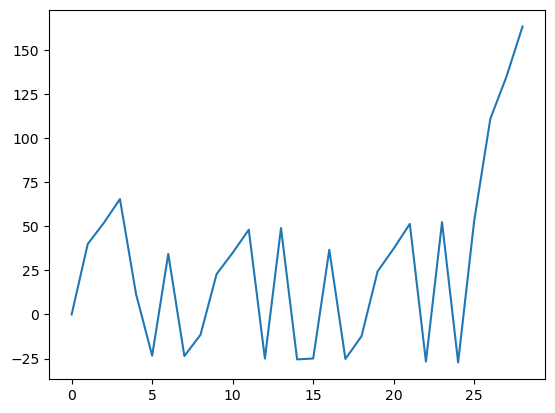

In [130]:
plt.plot(to_test) # профит за каждую сделку
print(np.mean(to_test))

262.21551464721466


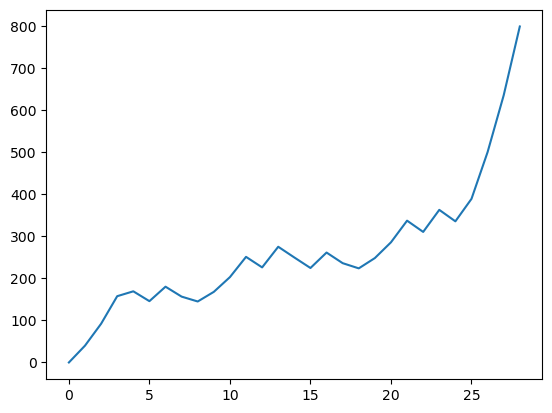

In [131]:
plt.plot(to_test.cumsum())
print(np.mean(to_test.cumsum()))

In [127]:
# средняя прибыль каждой сделки (или каждого месяца)
check_profit_hypothesis_3(to_test, 11)

Статистика: [295.], p-значение: [0.04816589]
Отвергаем нулевую гипотезу. Средняя месячная прибыль стратегии вероятно больше 11 долларов.


In [140]:
# статистически значимая прибыль СТРАТЕГИИ
check_profit_hypothesis_3(to_test.cumsum(), 202)

Статистика: 300.0, p-значение: 0.03799443319439888
Отвергаем нулевую гипотезу. Средняя месячная прибыль стратегии вероятно больше 202 долларов.


In [50]:
# check_profit_hypothesis(pd.DataFrame(to_test),0)

Коэффициенты

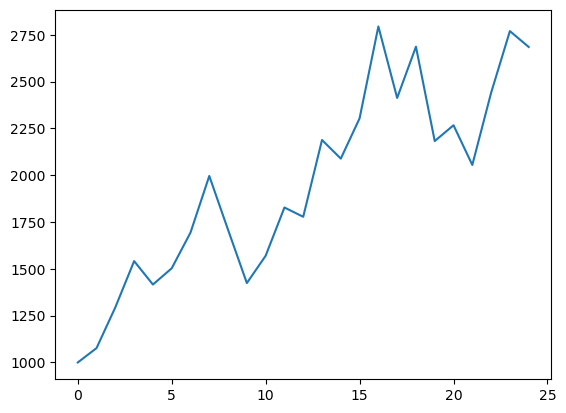

Profit factor:  1.8306167325155218
CMRG:  4.2005122240831305 %
GHPR:  4.2005122240831305 %
AHPR (Expectation):  5.04740002838662 %,  70.19086993194794 $
Deviation:  262.67567949718523 $
Z-index:  1.8980806165967428
Omega:  1.9689422202723796
Sortino ratio:  0.5289248441980231
Sharp ratio:  0.30337987273279876
Calmar ratio:  0.1465922328835448
Max drawdown:  28.65439826829082 %


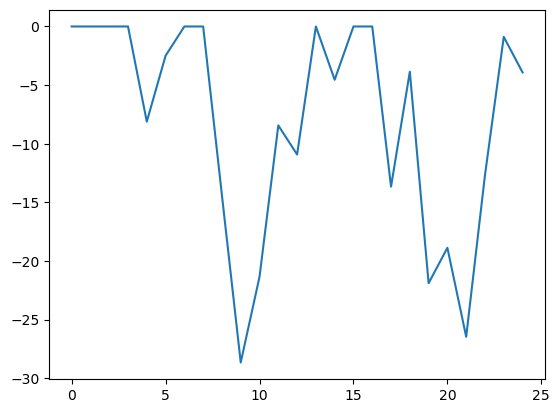

In [51]:
coeffs(s, 1000)